This is one of the deliverables produced from this project: https://library.hkust.edu.hk/ds/project/p002/
> Created by LAU Ming Kit, Jack (Year 4 student, BEng in Computer Engineering, HKUST)

In [30]:
from sklearn.cluster import KMeans
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

In [19]:
def bgremove1(myimage):
     
    # Blur to image to reduce noise
    myimage = cv2.GaussianBlur(myimage,(5,5), 0)
 
    # We bin the pixels. Result will be a value 1..5
    bins=np.array([0,51,102,153,204,255])
    myimage[:,:,:] = np.digitize(myimage[:,:,:],bins,right=True)*51
 
    # Create single channel greyscale for thresholding
    myimage_grey = cv2.cvtColor(myimage, cv2.COLOR_BGR2GRAY)
 
    # Perform Otsu thresholding and extract the background.
    # We use Binary Threshold as we want to create an all white background
    ret,background = cv2.threshold(myimage_grey,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
    # Convert black and white back into 3 channel greyscale
    background = cv2.cvtColor(background, cv2.COLOR_GRAY2BGR)
 
    # Perform Otsu thresholding and extract the foreground.
    # We use TOZERO_INV as we want to keep some details of the foregorund
    ret,foreground = cv2.threshold(myimage_grey,0,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)  #Currently foreground is only a mask
    foreground = cv2.bitwise_and(myimage,myimage, mask=foreground)  # Update foreground with bitwise_and to extract real foreground
 
    # Combine the background and foreground to obtain our final image
    finalimage = background+foreground
 
    return finalimage

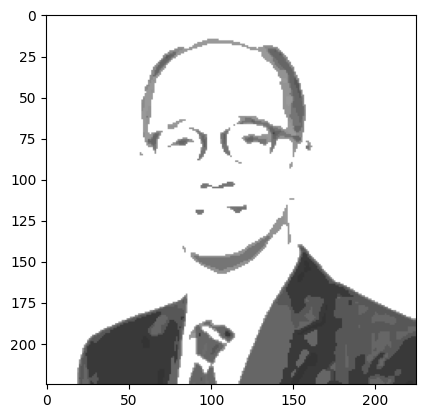

In [20]:
# img = cv2.imread('known/CHAN-Fan-Cheong-Tony_1.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('known/CHAN-Fan-Cheong-Tony_1.jpg')
img = bgremove1(img)
# img = cv2.resize(img, (128,128))
# img = cv2.resize(img, (128,128))
temp = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
temp = cv2.cvtColor(temp, cv2.COLOR_GRAY2RGB)
plt.imshow(temp)

## Without removing the background

In [21]:
image_dict = []
y = []
for i in os.listdir('known'):
    if os.path.isfile('known/'+i):
        img = cv2.imread('known/'+i, cv2.IMREAD_GRAYSCALE)
        image_dict.append(cv2.resize(img, (128,128)).flatten())
        y.append(i)
image_list = np.array(image_dict)
image_list.shape

(9, 16384)

In [22]:
counter = 0
cls = ['CHAN', 'SHUM', 'SHYY']
result = list(map(lambda x : 0 if 'CHAN' in x else 1 if 'SHUM' in x else 2, y))

In [23]:
km = KMeans(n_clusters=3).fit(image_list)
km.labels_

array([1, 2, 0, 1, 0, 0, 1, 1, 1])

In [26]:
accuracy_score(km.labels_, result)

0.2222222222222222

# Remove background

In [27]:
image_dict = []
y = []
for i in os.listdir('known'):
    if os.path.isfile('known/'+i):
        # img = cv2.imread('known/'+i, cv2.IMREAD_GRAYSCALE)
        img = cv2.imread('known/'+i)
        img = bgremove1(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        image_dict.append(cv2.resize(img, (128,128)).flatten())
        y.append(i)
image_list = np.array(image_dict)
image_list.shape

(9, 16384)

In [28]:
km = KMeans(n_clusters=3).fit(image_list)
km.labels_

array([0, 1, 1, 1, 1, 2, 0, 1, 1])

In [29]:
accuracy_score(km.labels_, result)

0.3333333333333333

# TSNE with kmeans

In [32]:
image_list.shape

(9, 16384)

In [34]:
x_embedded = TSNE(perplexity=5).fit_transform(image_list)
x_embedded.shape

(9, 2)

In [35]:
km = KMeans(n_clusters=3).fit(x_embedded)
km.labels_

array([0, 1, 2, 2, 2, 0, 0, 0, 2])

In [36]:
accuracy_score(km.labels_, result)

0.2222222222222222

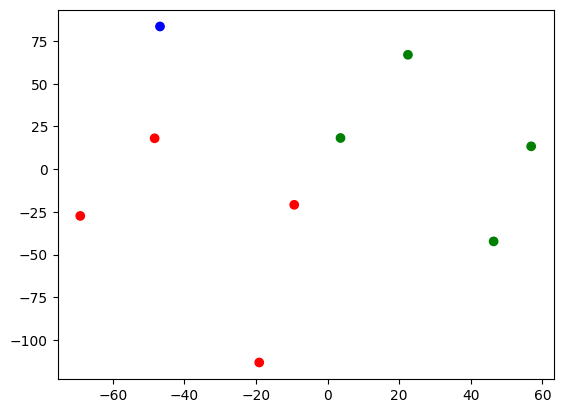

In [50]:
fig, ax = plt.subplots()
ax.scatter(x_embedded[:,0], x_embedded[:,1], color=['r' if not i else 'b' if i == 1 else 'g' for i in km.labels_])